## Look at Nfix temperature respons functions from: 
Bytnerowicz et al 2022 
       vs. 
Houlton et al 2008


In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# define functions

def Bytnerowicz_noAcc(Tmin_fix, Tmax_fix,Topt_fix,tc_soisno):
    Nfix = (((Tmax_fix-tc_soisno)/(Tmax_fix-Topt_fix))* \
             (((tc_soisno-Tmin_fix)/(Topt_fix-Tmin_fix)))** \
             ((Topt_fix- Tmin_fix)/(Tmax_fix-Topt_fix)) )
    return(Nfix)

def Houlton(a_fix, b_fix,C_fix,tc_soisno):
    Nfix = (1.25 ** (a_fix + b_fix * tc_soisno * (1. - 0.5 * tc_soisno / c_fix)) )
    return(Nfix)

In [3]:
## Tom's function for temperate systems
Tmin = -2.04
Topt = 32.10
Tmax = 43.98
tsoi = range(-10,50)
temp = np.full(len(tsoi), np.nan)
for i in range(len(tsoi)):
    if tsoi[i] > Tmin and tsoi[i] < Tmax:
        temp[i] = Bytnerowicz_noAcc(Tmin,Tmax,Topt,tsoi[i])
    else:
        temp[i] = 0.

In [4]:
## Tom's function for tropical systems
Tmin = 7.04
Topt = 33.22
Tmax = 45.35
trop = np.full(len(tsoi), np.nan)
for i in range(len(tsoi)):
    if tsoi[i] > Tmin and tsoi[i] < Tmax:
        trop[i] = Bytnerowicz_noAcc(Tmin,Tmax,Topt,tsoi[i])
    else:
        trop[i] = 0.

In [5]:
## Houlton function
a_fix =-3.61999988555908
b_fix = 0.270000010728836 
c_fix = 25.1499996185303
houl = np.full(len(tsoi), np.nan)
for i in range(len(tsoi)):
    houl[i] = Houlton(a_fix,b_fix,c_fix,tsoi[i])

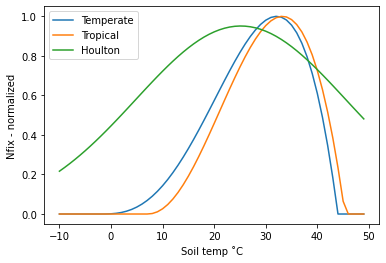

In [6]:
plt.plot(tsoi,temp, label='Temperate')
plt.plot(tsoi,trop, label='Tropical') 
plt.plot(tsoi,houl, label='Houlton') 
plt.xlabel('Soil temp ˚C')
plt.ylabel('Nfix - normalized')
plt.legend() ;

#### Costs are then inverted in FUN, setting min N:C = 6 

In [7]:
s_fix = -6
cost_temp = (-1*s_fix)/np.where(temp>0,temp,np.nan)
cost_trop = (-1*s_fix)/np.where(trop>0,trop,np.nan)
cost_houl = (-1*s_fix)/np.where(houl>0,houl,np.nan)

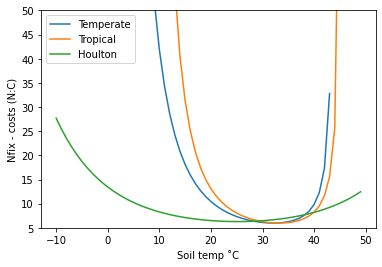

In [8]:
plt.plot(tsoi,cost_temp, label='Temperate')
plt.plot(tsoi,cost_trop, label='Tropical') 
plt.plot(tsoi,cost_houl, label='Houlton') 
plt.xlabel('Soil temp ˚C')
plt.ylabel('Nfix - costs (N:C)')
plt.ylim(5,50)
plt.legend() ;

In [9]:
tc_soila10 = tsoi
#Temperate accclimation function
tempACC = np.full(len(tc_soila10), np.nan)
for i in range(len(tc_soila10)):
    if (tc_soila10[i] < 18.5):
        Tmin_fix = -2.04
        Topt_fix = 32.10  
        Tmax_fix = 43.98 
    elif (tc_soila10[i] >= 18.5 and tc_soila10[i] < 28.5):
        Tmin_fix = 0.697 * tc_soila10[i] - 14.93          
        Topt_fix = 0.047 * tc_soila10[i] + 31.24
        Tmax_fix = 0.009 * tc_soila10[i] + 43.82
    else :
        Tmin_fix = 4.93
        Topt_fix = 32.58
        Tmax_fix = 44.08
    
    if tc_soila10[i] > Tmin_fix and tc_soila10[i] < Tmax_fix:
        tempACC[i] = Bytnerowicz_noAcc(Tmin_fix,Tmax_fix,Topt_fix,tc_soila10[i])
    else:
        tempACC[i] = 0.


In [10]:
#Tropical acclimation function
tropACC = np.full(len(tc_soila10), np.nan)
for i in range(len(tc_soila10)):
    Tmax_fix = 45.35
    if (tc_soila10[i] < 18.5):
        Tmin_fix = 2.37  
        Topt_fix = 30.34

    elif (tc_soila10[i] >= 18.5 and tc_soila10[i] < 28.5):
        Tmin_fix = 0.932 * tc_soila10[i] - 14.87
        Topt_fix = 0.574 * tc_soila10[i] + 19.72
    else :
        Tmin_fix = 11.69
        Topt_fix = 36.08
    
    if tc_soila10[i] > 2.37  and tc_soila10[i] < 45.35:
        tropACC[i] = Bytnerowicz_noAcc(Tmin_fix,Tmax_fix,Topt_fix,tc_soila10[i])
    else:
        tropACC[i] = 0.



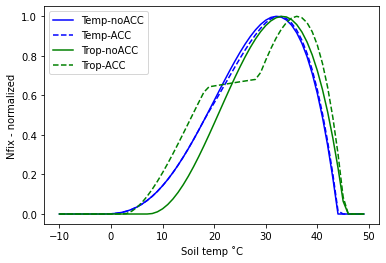

In [21]:
plt.plot(tsoi,temp,'b-', label='Temp-noACC')
plt.plot(tsoi,tempACC,'b--', label='Temp-ACC') 
plt.plot(tsoi,trop, 'g-', label='Trop-noACC')
plt.plot(tsoi,tropACC,'g--', label='Trop-ACC') 

plt.xlabel('Soil temp ˚C')
plt.ylabel('Nfix - normalized')
plt.legend() ;

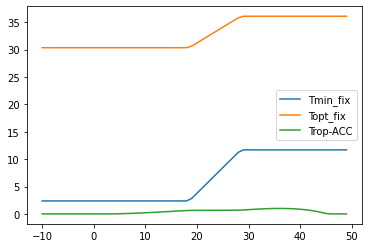

In [75]:
Tmin_fix =np.full(len(tc_soila10), np.nan)
Topt_fix =np.full(len(tc_soila10), np.nan)
for i in range(len(tc_soila10)):
    if (tc_soila10[i] <= 18.5):
        Tmin_fix[i] = 2.37  
        Topt_fix[i] = 30.34

    elif (tc_soila10[i] > 18.5 and tc_soila10[i] < 28.5):
        Tmin_fix[i] = 0.932 * tc_soila10[i] - 14.87
        Topt_fix[i] = 0.574 * tc_soila10[i] + 19.72
    else :
        Tmin_fix[i] = 11.69
        Topt_fix[i] = 36.08

plt.plot(tc_soila10,Tmin_fix, label='Tmin_fix')
plt.plot(tc_soila10,Topt_fix, label='Topt_fix')
plt.plot(tsoi,tropACC, label='Trop-ACC') 
plt.legend() ;  

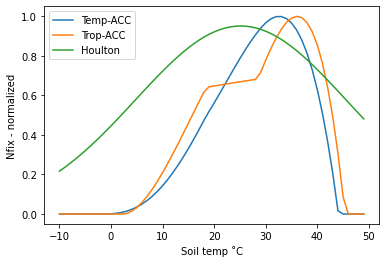